In [3]:
!pip install opencv-python
!pip install pytesseract
!apt-get install tesseract-ocr
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract
# Pytesseract is an optical character recognition tool for Python that is used to extract text from images. It is a wrapper for Google’s Tesseract-OCR Engine and supports a wide variety of languages.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,744 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe 

**Import image（导入图像）**

In [4]:
import cv2
import pytesseract
from google.colab import files

# Upload image（上传图像）
uploaded = files.upload()

# Load Image（加载图像）
for filename in uploaded.keys():
  img_path = filename

# Read image（读取图像）
image = cv2.imread(img_path)

# Adding custom options（添加自定义选项）
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(image, config=custom_config)

Saving u=3358404510,3426401683&fm=253&app=120&f=JPEG.png to u=3358404510,3426401683&fm=253&app=120&f=JPEG.png


'li Logo\nCompany Name INVOICE\nLorem ipsum dolar sit amet consectetuer\nacipscing elt sed diam nonummy\nInvoice id #XXXXXXXX | Data 01/01/2018 company name\nBill for: Name aes\nAddrees: ZIP Code\nZIP Code +123 456 78 90\n#123 456 78 90 wwwyourwebsite.xxx\nyour@mail.xxx your@mailsox\nPRODUCT DESCRIPTION QTy PRICE TOTAL\nPRODUCT 1 3 $5.00 $15.00\nPRODUCT 2 Ss $2.00 $10.00\n—PRODUCT3 $100.00 $100.00\nPRODUCT 4 15 $7.00 $115.00\nPRODUCT 5. 6 $2.00 $12.00\nPRODUCT 6 2 $17.00 $34.00\nSubtotal $286.00\nShipping $15.00\nTax Rate $1.00\nLorem ipsum dolor st amet, consectetuer aipicing et, sed alam nonummy eibh euismod tincidunt laoreet dolore magna aqua erat volutpat. Ut\n‘wis enim ad minim veniam, qu nos exer tation uilacorpersscpt aborts isl talquipexea commodo consequat\nSignature\n\x0c'

**Preprocessing for Tesseract（Tesseract 的预处理）**

In [5]:
import numpy as np



# get grayscale image（获取灰度图像）
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal（噪声消除）
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding（阈值化）
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation（膨胀）
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion（腐蚀）
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation（开操作—先腐蚀后膨胀）
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection（边缘检测）
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction（倾斜校正）
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching（模板匹配）
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

**Image processing（图像处理）**

In [6]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [7]:
# this is only for google colab, the original is cv2.imshow()（这只适用于googlecolab，原来是cv2.imshow（））
from google.colab.patches import cv2_imshow

**Show the effect of grayscale processing（展示灰度处理效果）**

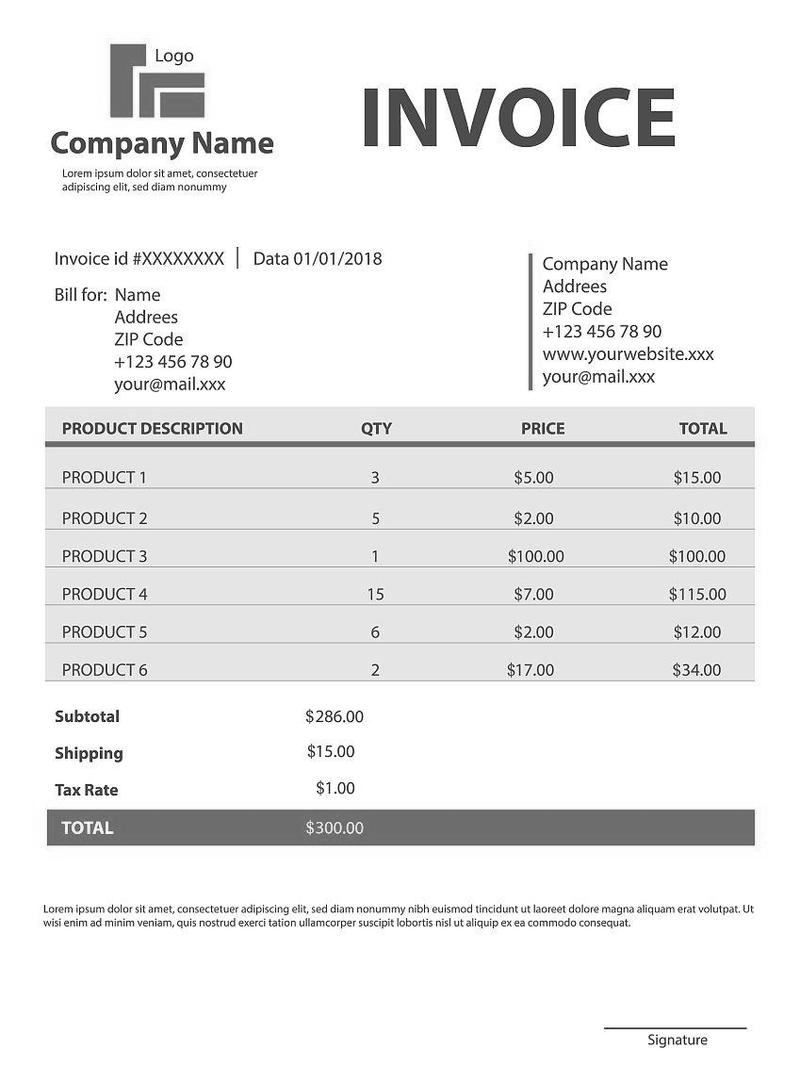

'lf Logo\nCompany Name | NVOICE\nLotem ipsum dolor sitamet, consectetuer\nadipiscing eli, sed diam nonummy\nInvoice id #XXXXXXXX | Data 01/01/2018 Company Name\nBill for: Name eee\nAddrees: ZIP Code\nZIP Code +123 456 78 90\n+123 456 78 90 www.yourwebsite.xxx\nyour@mail.xxx yeutiontallsee\nPRODUCT DESCRIPTION QTY PRICE TOTAL\nPRODUCT 1 3 $5.00 $15.00\nPRODUCT 2 Ss $2.00 $10.00\nPRODUCT 3 1 $100.00 $100.00\n__ PRODUCT 4 15 $7.00 $115.00\nPRODUCT 5. 6 $2.00 $12.00\nPRODUCT 6 2 $17.00 $34.00,\nSubtotal $286.00\nShipping $15.00\nTax Rate $1.00\nTOTAL $300.00\nLorem ipsum dolar sit amet, consectetuer adipiscing elit, sed diam nonummy nibh eulsmed tincidunt ut laoreet dolore magna aliquam erat volutpat. Ut\n-wisi enim ad minim veniam, quis nostrud exerci tation ullamcorper suscipit lobortis nisl ut aliquip ex ea commodo consequat\nSignature\n\x0c'

In [8]:
img = gray
cv2_imshow(img)
# Adding custom options（添加自定义选项：指定 OCR 引擎模式 (OEM)、页面分割模式 (PSM)）
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

**Show the effect of thresholding processing(展示阈值化后的效果)**

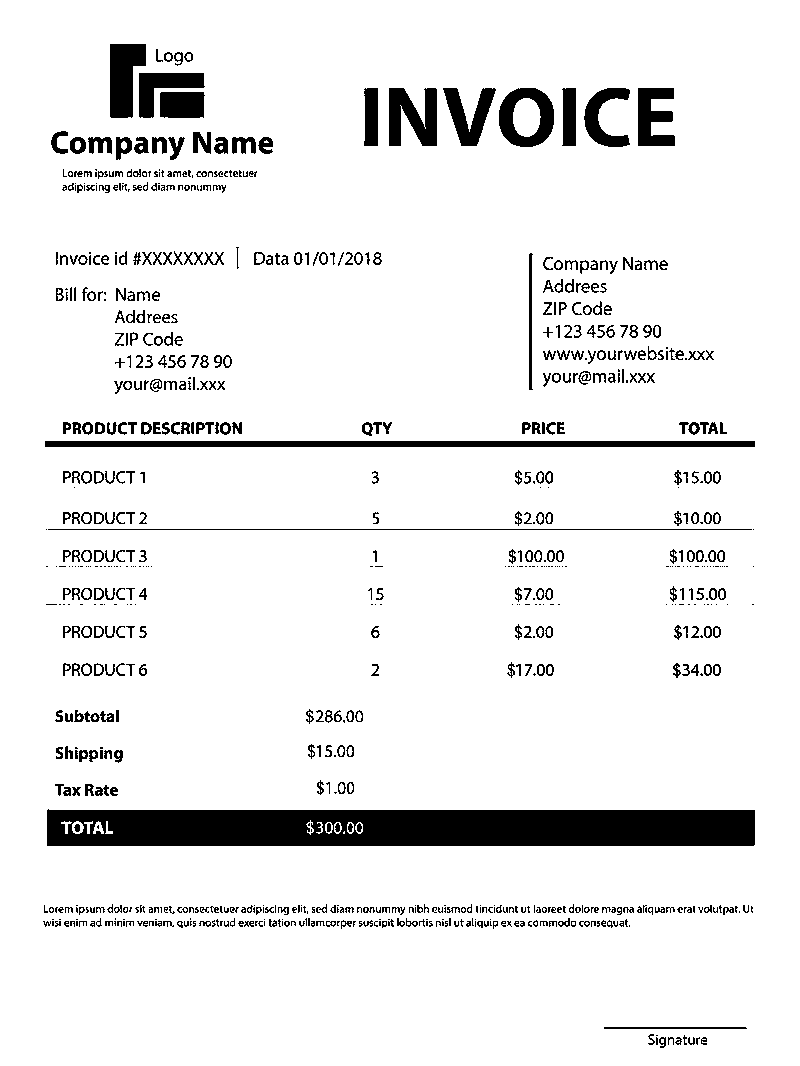

'i Logo\nCompany Name | NVOICE\nLorem ipsum dolar sit amet, consectetuer\nadipiscing eb, sed diam nonummy\nInvoice id BXXXXXXXX | Data 01/01/2018 Company Name\nBill for: Name Addrees\nAddrees ZIP Code\nZIP Code +123 456 78 90\n4123 456 7890 www. yourwebsite.xx\nyour@mail.xxx your@mail.xex\nPRODUCT DESCRIPTION QTy PRICE TOTAL\nPRODUCT 1 3 $5.00 $15.00\nPRODUCT 2 5 $2.00 $10.00\nPRODUCT 3 1 $100.00 $100.00\n_ PRODUCT 4 15 $7.00 $115.00\nPRODUCT 5S. 6 $2.00 $12.00\nPRODUCT 6 2 $17.00 $34.00\nSubtotal $286.00\nShipping $15.00\nTax Rate $1.00\nmera $300.00\nLocemipsum dota st amet consectetuer acipsclg eli, sed diam nonumy nibh eusmad tincidunt ut laoreet dolore mage aliquam erat volutpat. Ut\n‘wisi enim ad mina veniam, quis nostrud exec tation ullamcorper suscinit lobortis nisl ut aliquip exea commodo consequat.\nSignature\n\x0c'

In [9]:
img = thresh
cv2_imshow(img)
# Adding custom options（添加自定义选项：指定 OCR 引擎模式 (OEM)、页面分割模式 (PSM)）
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

**Show the effect of opening the operation（展示开操作后的效果）**


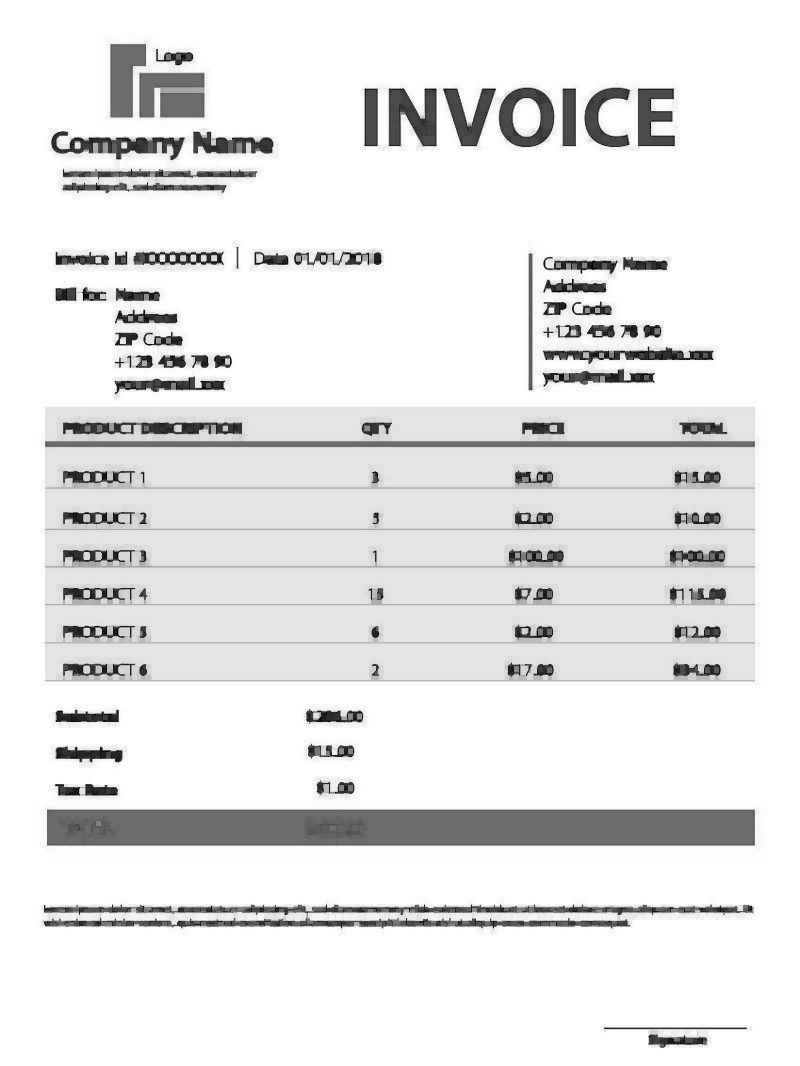

'lz\nAe a ah oem mal a\nat ot, beeen amma\niewoice inl MOOCOOON | Dale 01/0/2018 Commpueny Mom\nBl fox: Maame —\ncilroos =\nTP Code +123 456 78 90\n+123 456 78 90 ewer your walla ant\nyourearmiL oar weenie\nPRODUCT DECRIPTICN ay = TO\nPRODUCT 1 3 00 14.00\nPRODUCT 2 3 oo oso\nPRODUCT 3 1 ome pron.\nPRODUCT 4 w om nus\nPRODUCT 5 ‘ om 200\nPRODUCT 6 2 07.0 0\nGraistectal 120.00\nfee 00\nTam Pat 20\n——————————_[— —S=_a__==—\no_o\n\x0c'

In [10]:
img = opening
cv2_imshow(img)
# Adding custom options（添加自定义选项：指定 OCR 引擎模式 (OEM)、页面分割模式 (PSM)）
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

**Show the effect of edge detection（展示边缘检测的效果）**

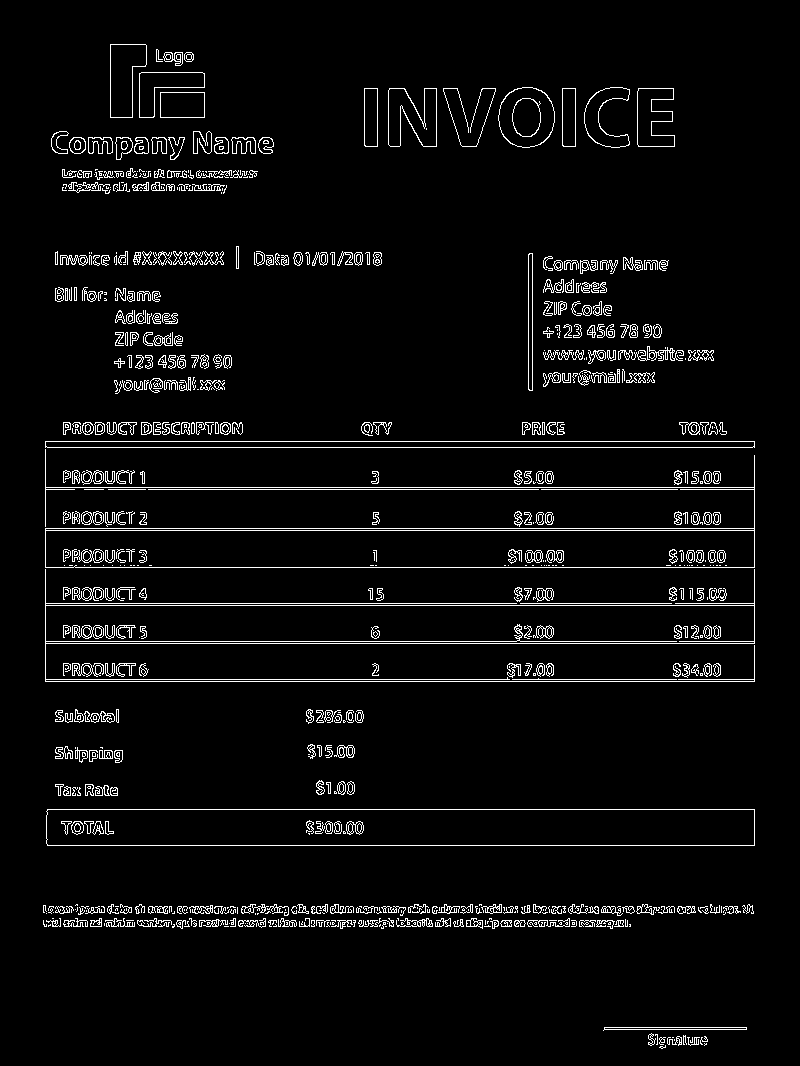

'fi eo)\nCompany Name | NWO I @ E\nCe aa ace\npresente ee\nTce mB OL DT) eee\nEe ad aad\nAdchees paleo)\nne ee EL\nre sa le Nihal\nyour@mallt see youréemallsan\nPRODUCT DESCRIPTION ar Lees moray\nsss ———————=———_—_—S——_—XXXX\neee EI] EE EEG\nPROOUCT 2 Ey Eg Eola)\nCoven 1 Eee) $100.60\n(aro o Uae) 13 $7.00 $115.69\naioe) 6 $2.00 STE)\nLoreen 2 AIPA $34.00\nSubtetal PCA)\na) eta\nacy TR]\nTOTAL Ee OMG)\nEe Ne eee eee ee aa\nPeseta eee eae Mee Nett\nee\n\x0c'

In [11]:
img = canny
cv2_imshow(img)
# Adding custom options（添加自定义选项：指定 OCR 引擎模式 (OEM)、页面分割模式 (PSM)）
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

**Key（键）**

In [13]:
import pytesseract
from pytesseract import Output

img = cv2.imread(img_path)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


**Getting boxes around text（在文本周围加边框）**

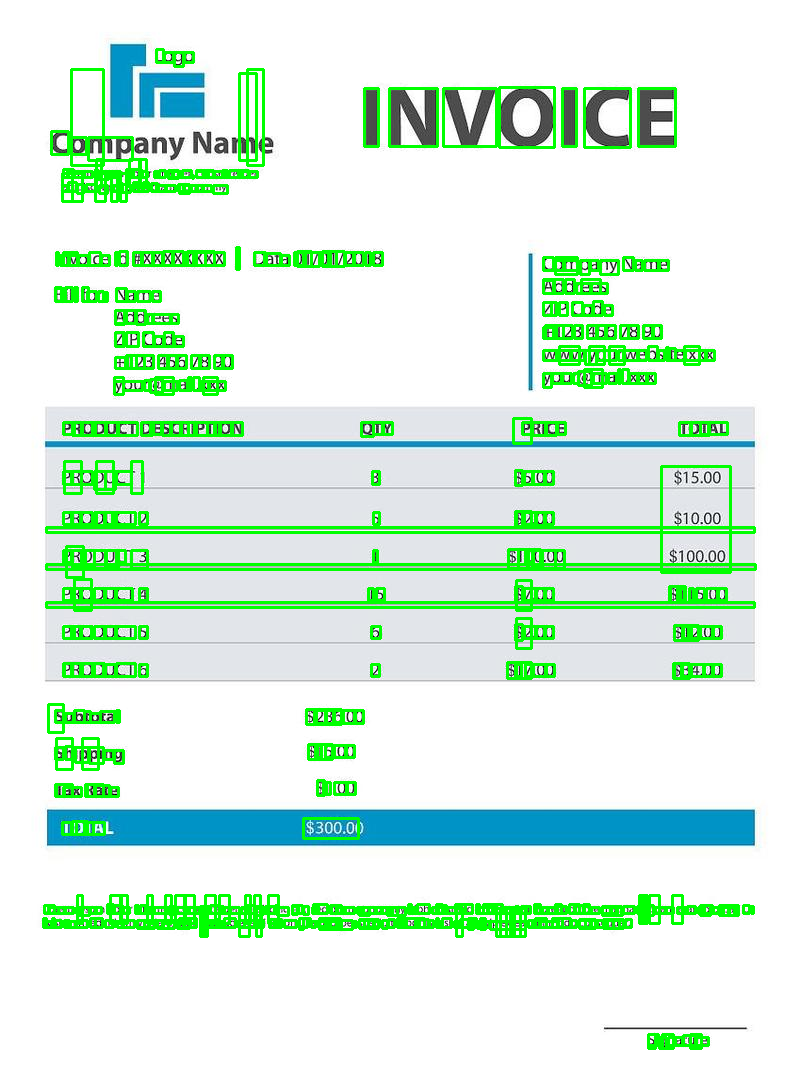

In [14]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Assuming 'img' is already loaded as an image（假设“img”已作为图像加载）
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)

# Draw bounding boxes around detected text（在检测到的文本周围绘制边框）
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Display the image with bounding boxes（显示带有边框的图像）
cv2_imshow(img)

# No need for cv2.waitKey(0) in Google Colab（Google Colab中不需要cv2.waitKey（0））


**Getting boxes around text words（获取文本单词周围的边框）**

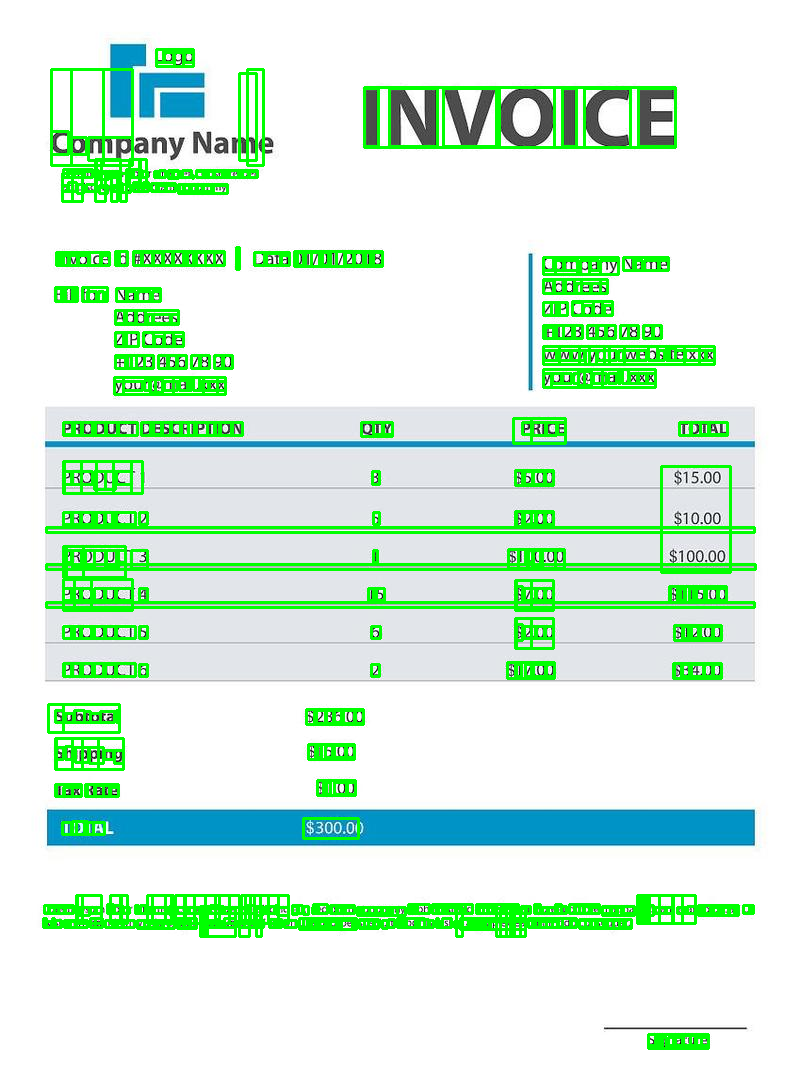

In [15]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)



**Text template matching（文本模板匹配）**

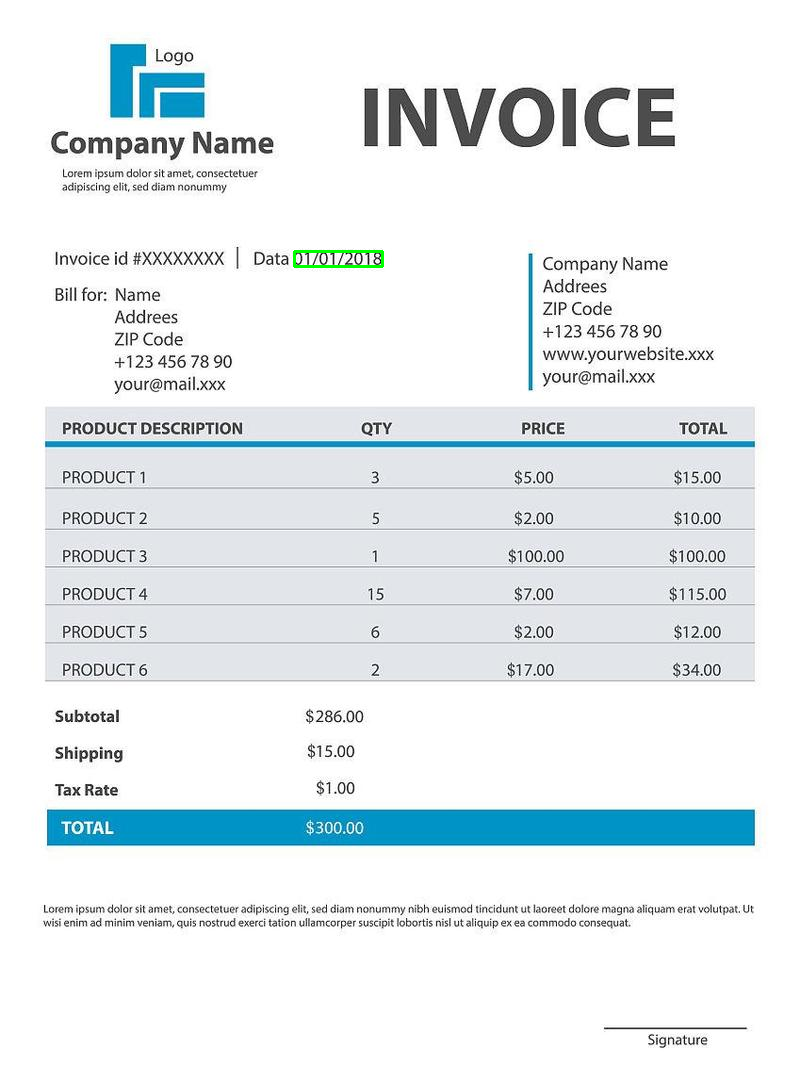

In [16]:
import re
import cv2
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Read image（读取图像）
img = cv2.imread(img_path)

# Extract text data（提取文本数据）
d = pytesseract.image_to_data(img, output_type=Output.DICT)

# Define regular expression (date format xx/yy/zzzz)  定义正则表达式（日期格式为xx/yy/zzzz）
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

# Get the number of text boxes（获取文本框数量）
n_boxes = len(d['text'])

# Traverse each text box（遍历每个文本框）
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:  # Confidence check（置信度检查）
        if re.match(date_pattern, d['text'][i]):  # Date matching（日期匹配）
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a rectangular box（绘制矩形框）

# 使用 cv2_imshow 显示结果图像
cv2_imshow(img)

**Detection_only numbers（检测-仅限数字）**

In [17]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))


407207
0
7 1234567890
41234567890 ..
. .
1 3 5.00 15.00
2 5 2.00 10.00
3.8100.008100.00
4 15 7.00 115.00
5 6 2.00 12.00
6 2 17.00 34.00
286.00
15.00
1.00
.1 300.00
..
-..



**Blacklisting characters（字符列入黑名单）**

In [18]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)


'li Logo\nCompany Name INVOICE\nLorem ipsum dolar sit amet, consectetuer\nadipicing et sed diam nonummy\nInvoice id #XXXXXXXX | Data OIZOTZZOTS Cotnpary Name\nBill for: Name Addrees\nAddrees: ZIP Code\nZIP Code + O\n+ € www.yourwebsite.xxx\nyour@mail.xxx your@mail.xxx\nPRODUCT DESCRIPTION QTy PRICE TOTAL\nPRODUCT $. $.O\nPRODUCT S $. $.O\n—PRODUCTZ. $._*$.\nPRODUCT $?. $S.O\nPRODUCT § é $. $.O\nPRODUCT € $.O $.\nSubtotal $B.O\nShipping $.\nTax Rate $.\nAKey/.\\e $.\nLorem ipsum dolor sit amet, consectetuer adipiscing eit, sed diam nonummy nibh euismod tinckdunt ut laoret dolore magna aliquam era volutpat. Ut\n‘wisi enim ad minim veniam, quis nosteud exerci tation ullamcorper suscipit lobortis nis ut aliquip ex ea commodo consequat.\nSignature\n\x0c'

**Select language（选择语言）**

In [19]:
!tesseract --list-langs
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

List of available languages (2):
eng
osd


'li Logo\nCompany Name INVOICE\nLorem ipsum dolar sit amet, consectetuer\nadipicing et sed diam nonummy\nInvoice id #XXXXXXXX | Data OIZOTZZ0TS Cotnpary Name\nBill for: Name Addrees\nAddrees: ZIP Code\nZIP Code +123 456 78 90\n4123 456 78 90 www.yourwebsite.xxx\nyour@mail.xxx your@mail.xxx\nPRODUCT DESCRIPTION QTy PRICE TOTAL\nPRODUCT 1 3 $5.00 $15.00\nPRODUCT 2 5 $2.00 $10.00\n—PRODUCT3 $100.00 $100.00\nPRODUCT 4 15 $7.00 $115.00\nPRODUCT 5 6 $2.00 $12.00\nPRODUCT 6 2 $17.00 $34.00\nSubtotal $286.00\nShipping $15.00\nTax Rate $1.00\nAKey/.\\e $300.00\nLorem ipsum dolor sit amet, consectetuer adipiscing eit, sed diam nonummy nibh euismod tinckdunt ut laoret dolore magna aliquam era volutpat. Ut\n‘wisi enim ad minim veniam, quis nosteud exerci tation ullamcorper suscipit lobortis nis ut aliquip ex ea commodo consequat.\nSignature\n\x0c'

**Detection in multiple languages（多语言检测）**

In [20]:
#Download Chinese, Japanese, and Korean languages（下载中日韩语言）
!sudo apt-get install tesseract-ocr-chi-sim
!sudo apt-get install tesseract-ocr-jpn
!sudo apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-chi-sim
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,634 kB of archives.
After this operation, 2,484 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-chi-sim all 1:4.00~git30-7274cfa-1.1 [1,634 kB]
Fetched 1,634 kB in 1min 4s (25.6 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-

**Import text image（导入文本图像）**

Saving src=http___ci.xiaohongshu.com_ad20d654-f7a4-d783-0dd4-2b1779c03c0b_imageView2_2_w_1080_format_jpg&refer=http___ci.xiaohongshu.webp to src=http___ci.xiaohongshu.com_ad20d654-f7a4-d783-0dd4-2b1779c03c0b_imageView2_2_w_1080_format_jpg&refer=http___ci.xiaohongshu.webp


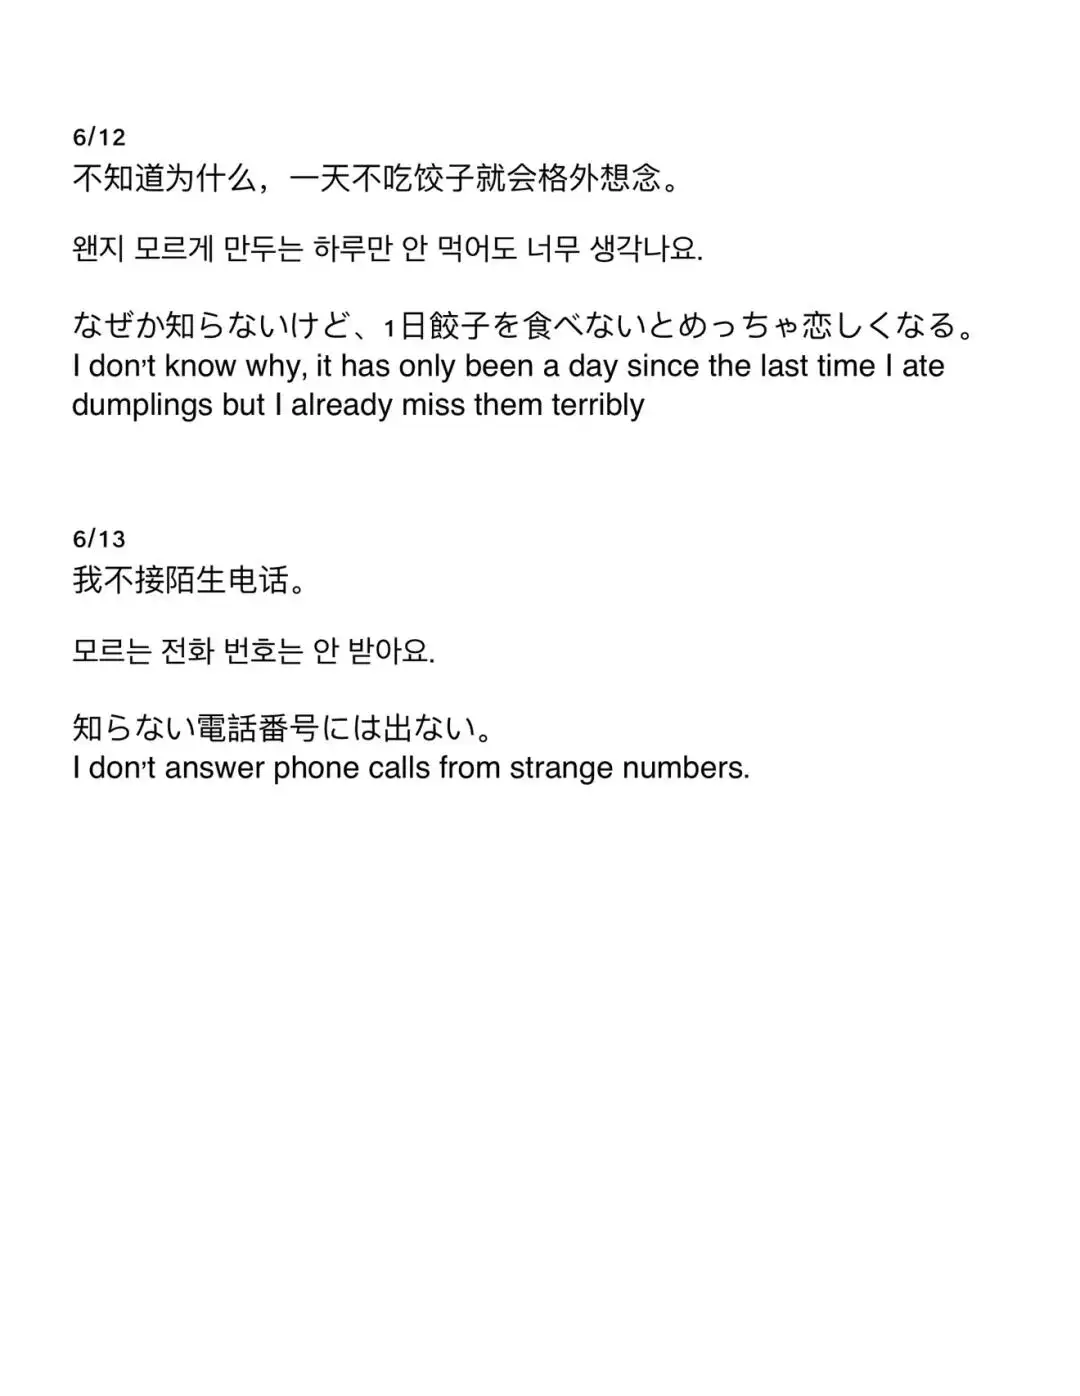

'6/12\n\n不知道为什么，一天不吃饺子就会格外想念。\n\n名| 呈呈2 만두는 하루만 안 먹어도 너무 생각나요.\n\nなぜか知らないけど、1日餃子を食べないとめっちゃ恋しくなる。\n| don’t know why, it has only been a day since the last time | ate\ndumplings but | already miss them terribly\n\n6/13\n\n我不接陌生电话。\n\n모르는 전화 번호는 안 받아요.\n\n知らない電話番号には出ない。\n\n| don’t answer phone calls from strange numbers.\n\x0c'

In [21]:
# Upload image（上传图像）
uploaded = files.upload()

# Load Image（加载图像）
for filename in uploaded.keys():
  img2_path = filename

# Read image（读取图像）
img2 = cv2.imread(img2_path)

cv2_imshow(img2)
# Adding custom options（添加自定义选项：指定 OCR 引擎模式 (OEM)、页面分割模式 (PSM)）
custom_config = r'-l chi_sim+jpn+kor+eng --psm 6'
pytesseract.image_to_string(img2, config=custom_config)

**Language detection（语言检测）**

In [22]:
!pip -q install langdetect
custom_config = r'-l chi_sim+jpn+kor+eng --psm 6'
txt = pytesseract.image_to_string(img2, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


[en:0.9999957928218873]

**Script, run in loop for read pages（脚本，循环运行以读取页面）**

In [23]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale（将图像转换为灰度）
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold（执行OTSU阈值）
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()



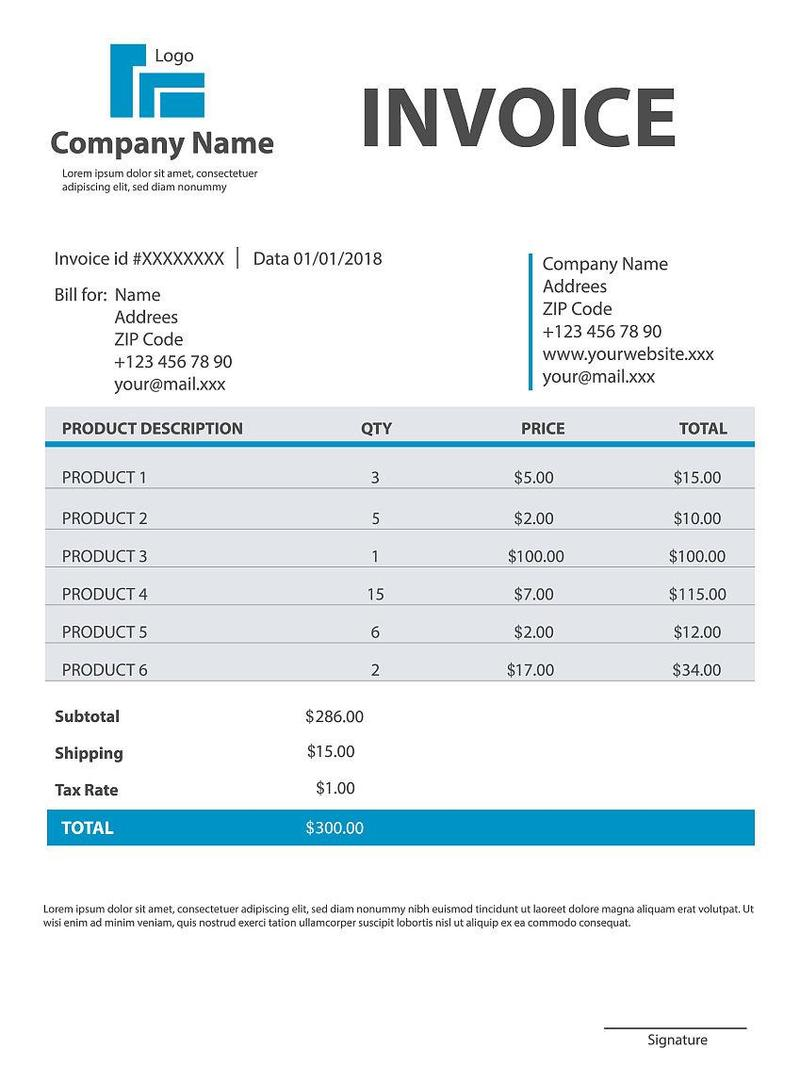



adipiscing elit, sed diam nonummy

Lorem ipsum dotorsitamet, consectetuer



Company Name

Ta

li Logo





Invoice id #XXXXXXXX | Data 01/01/2018



your@mail.xxx

www.yourwebsite.xxx

+123 456 78 90



ZIP Code



Addrees

Company Name



your@mail.xxx

+123 456 78 90

ZIP Code

Addrees

Bill for: Name



PRODUCT DESCRIPTION QTy PRICE TOTAL



$5.00



$15.00



PRODUCT 1





PRODUCT 2 cl $2.00 $10.00



$100.00.



$100.00



PRODUCT 3.



 





$115.00



$7.00



PRODUCT 4







$2.00



$12.00



PRODUCT 5.





$17.00



PRODUCT 6



$34.00,





$286.00



Subtotal



$15.00



Shipping



 



TOTAL



Tax Rate $1.00



‘wisi enim ad minim veniam, quis nostrud exerci tation ullamcorper suscipit lobortis nis ut aliquip ex ea commodo consequat.

Lorem ipsum dotor sit amet, consectetuer adipiscing elit, sed diam nonummy nibh euismod tincidunt ut laoreet dolore magna aliquam erat volutpat, Ut



Signature



In [24]:
image = cv2.imread(img_path)
read_text_from_image(image)

# OCR results（OCR结果）
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()